K(pi/4) = 1.8540746773


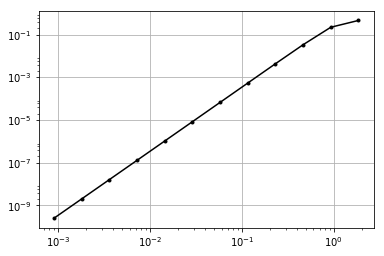

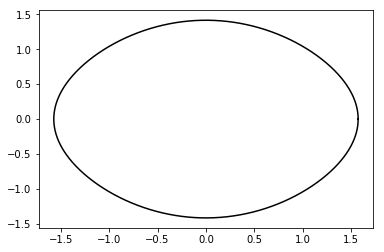

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import ellipk

%matplotlib inline

def step(tn, tau, un):
    k1 = G(tn, un)
    k2 = G(tn + (1/3) * tau, un + (1/3) * tau * k1)
    k3 = G(tn + (2/3) * tau, un + (2/3) * tau * k2)
    return un + tau * (0.25 * k1 + 0.75 * k3)

def G(t, u): return np.array([u[1], - np.sin(u[0])])

def ODUsolve(N):
    #alpha = sp.pi / 4
    #T = K(alpha)
    #print(K(alpha))
    T = 4 * ellipk(1/2)
    tau = T / N
    u = np.zeros((N + 1, 2))
    u[0] = np.array([math.pi / 2, 0])
    for n in range(N):
        u[n+1] = step(tau * n, tau, u[n])
    return u

def ODUplot(u):
    plt.plot(u[:,0], u[:, 1], color='black')
    plt.show()
    
def errPlot(N):
    t = np.empty(0)
    x = np.empty(0)
    T = 4 * ellipk(1/2)
    for n in 2**np.arange(2, np.ceil(np.log2(N)).astype(int)):
        y = ODUsolve(n)
        m = np.array(np.linalg.norm(y[-1,:] - y[0, :]))
        x = np.append(x, m)
        t = np.append(t, T / n)
        #print(T / n)
    plt.loglog(t, x, 'k.-')
    plt.grid()
    plt.show()
    #print(t)
    #print(x)

print('K(pi/4) =', ellipk(1/2))
N = 10000
errPlot(N)
u = ODUsolve(N)
ODUplot(u)